# INTRODUCTION

It's no surprise to say that companies suffer when their customers cancel their subscription and stop using their services. A particular telecommunication company requires help in coming up with a business solution in order to solve their issue with customers churning. Apart from that, the company would also like to know if a customer is worth retaining. Thus, the objectives in this project are as follows:
- Predicting customers who are likely to churn
- Determining customer value
- Creating a suitable retention program

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
pd.set_option('display.max_columns', 500)

# DATA OVERVIEW

From the given description of this data set, some information are already known about the columns in our data set as such:

- Churn indicates the customers who left within the last month, which is our target variable
- Services that customers have signed up for, which are phone service, multiple lines, internet, online security, online backup, device protection, tech support, TV streaming, and movie streaming
- Customer account information, which are tenure, contract type, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers, which are gender, if they are a senior citizen, and if they have partners and dependents

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.duplicated().sum()

0

With a quick glance at the data set, we can see that there are 21 columns and 7043 rows in total. Upon inspecting the just a few rows, we see that there are some data in numerical form, which would be senior citizen, tenure, monthly charges, and total charges. Contradictingly, the total charges column was listed as an object instead of a numerical data type, which needs to be fixed early before we proceed with any more data exploration.

## INITIAL DATA FIXING

The issue with the column TotalCharges is that customers with 0 tenure who had yet to pay was listed as an empty string. This is quickly fixed with a little bit of data cleaning before the data type can be changed.

In [6]:
df['TotalCharges'].describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [7]:
df[df['TotalCharges']==' '].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [8]:
df['TotalCharges'] = df['TotalCharges'].str.strip().replace('', 0).astype('float').copy()
df['TotalCharges'].dtype

dtype('float64')

In [9]:
target = df['Churn'].copy()
target_label = 'Churn'

In [10]:
cats = [col for col in df.columns if (df[col].dtype == 'object') & (col not in ['customerID'])]
nums = [col for col in df.columns if df[col].dtype != 'object']
print(cats)
print(nums)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [11]:
df[cats].describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [12]:
df[nums].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# EXPLORATORY DATA ANALYSIS

This section consists of quick visualizations to conduct univariate analysis and bivariate analysis, to view the distributions and outliers of each of the features and to see if any anomalies exist in our data. The features are grouped into two categories based on their data types, namely numerical and categorical, as they require different types of analysis.

gender


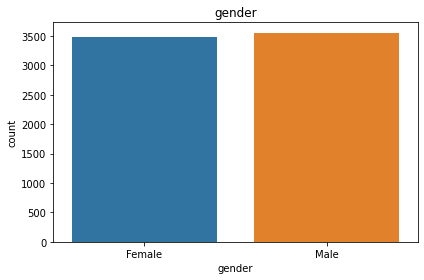

Partner


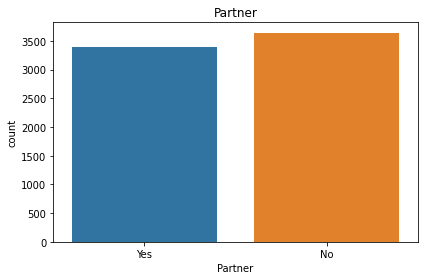

Dependents


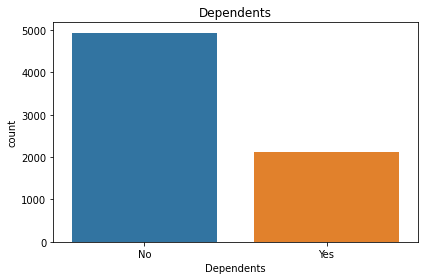

PhoneService


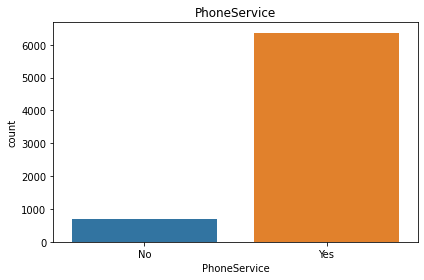

MultipleLines


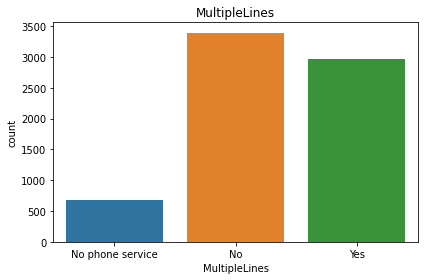

InternetService


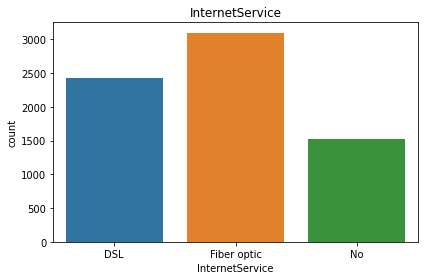

OnlineSecurity


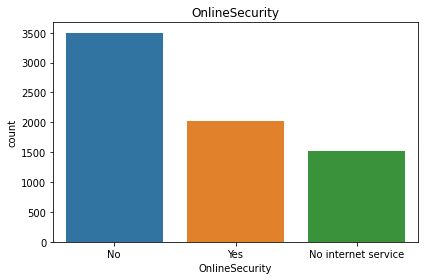

OnlineBackup


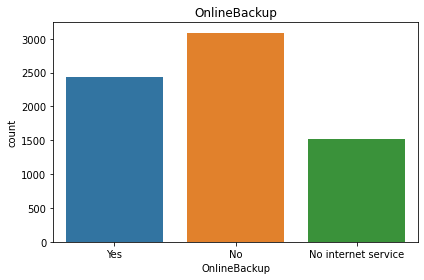

DeviceProtection


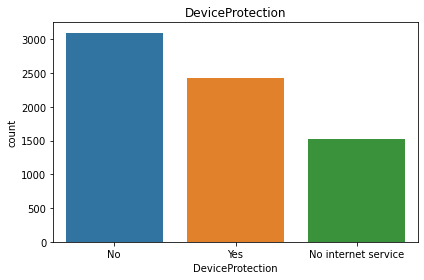

TechSupport


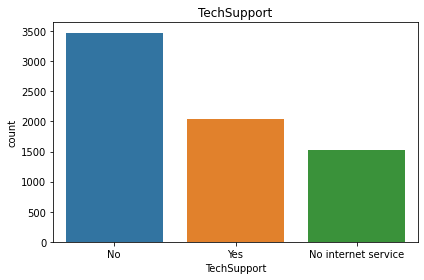

StreamingTV


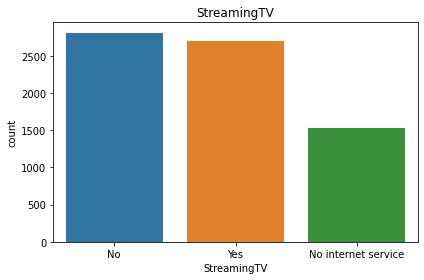

StreamingMovies


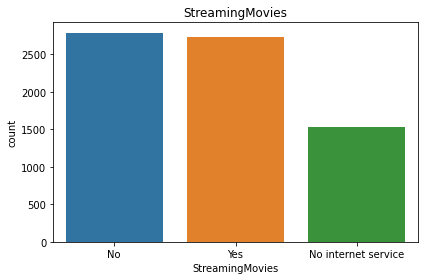

Contract


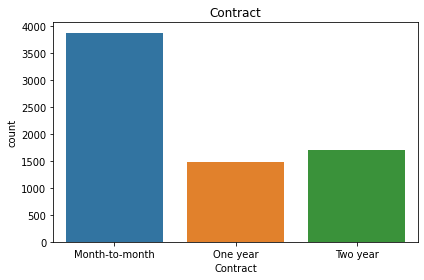

PaperlessBilling


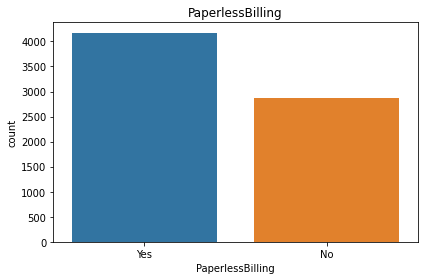

PaymentMethod


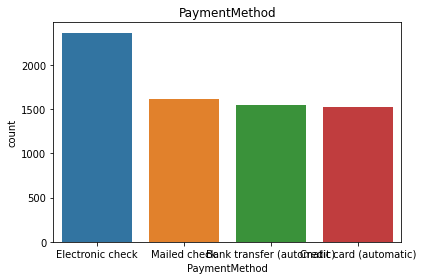

Churn


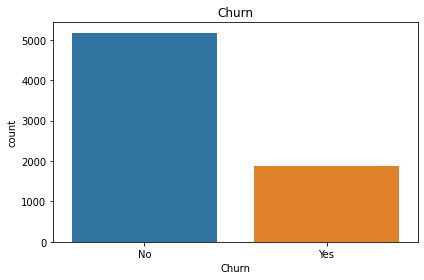

In [13]:
for col in cats:
    print(col)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.tight_layout()
    plt.show()

gender


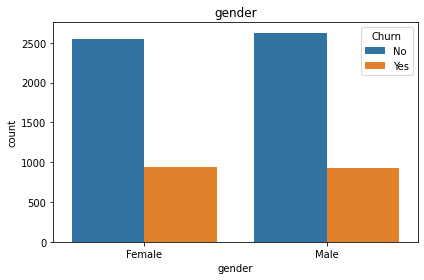

Partner


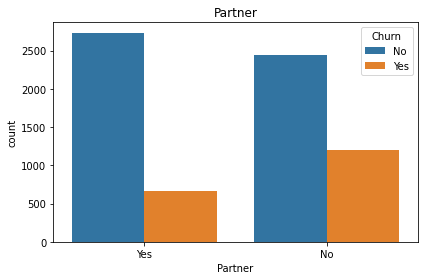

Dependents


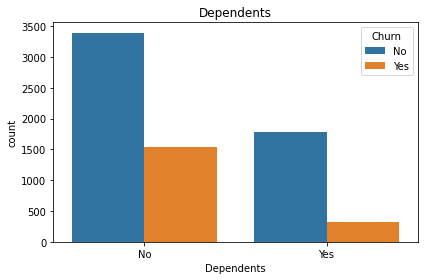

PhoneService


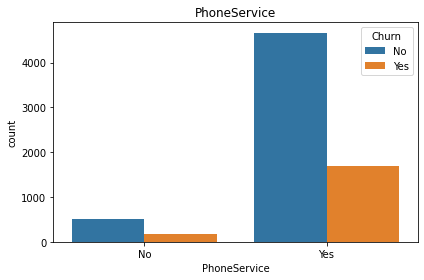

MultipleLines


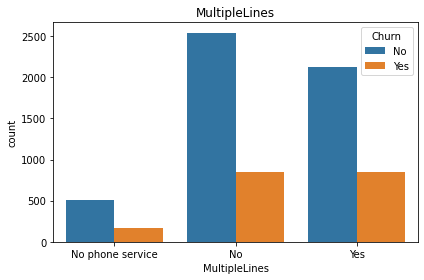

InternetService


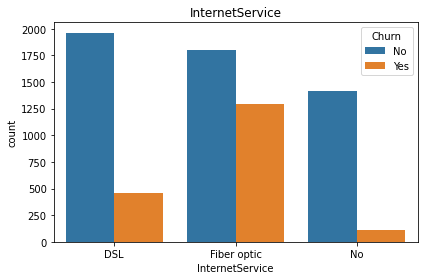

OnlineSecurity


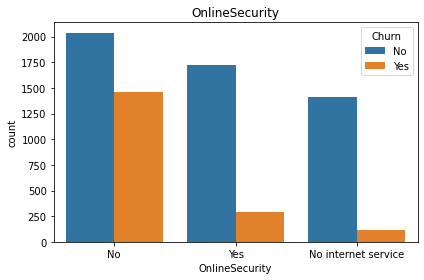

OnlineBackup


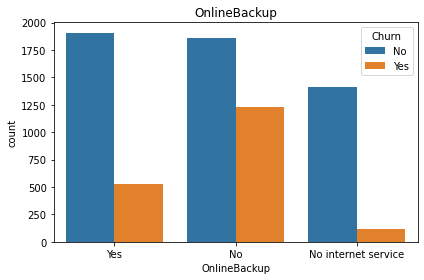

DeviceProtection


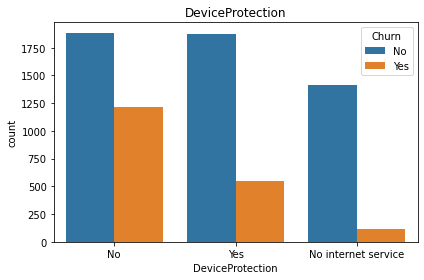

TechSupport


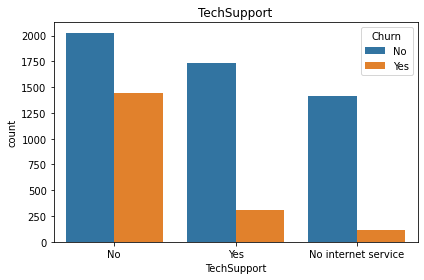

StreamingTV


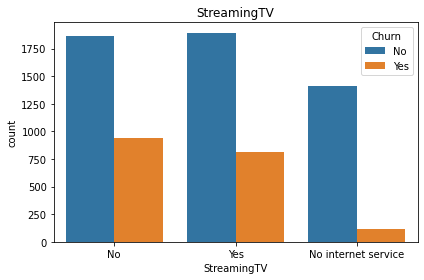

StreamingMovies


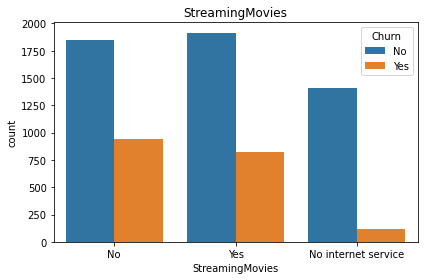

Contract


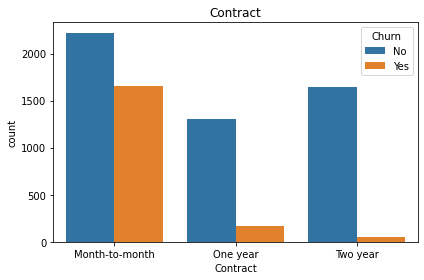

PaperlessBilling


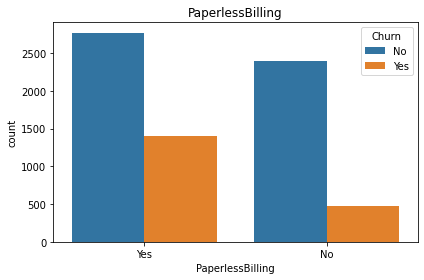

PaymentMethod


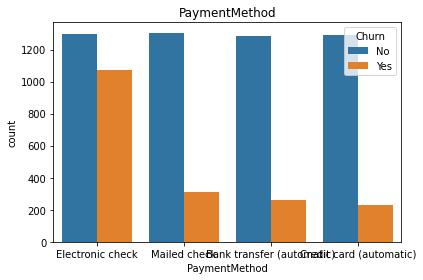

Churn


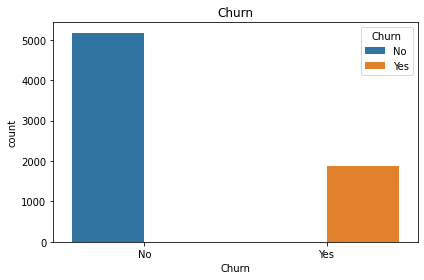

In [14]:
for col in cats:
    print(col)
    sns.countplot(data=df, x=col, hue=target_label)
    plt.title(col)
    plt.tight_layout()
    plt.show()

SeniorCitizen


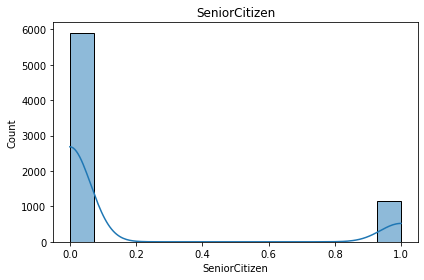

tenure


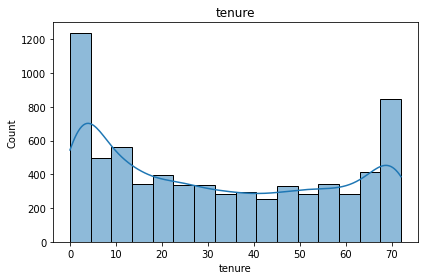

MonthlyCharges


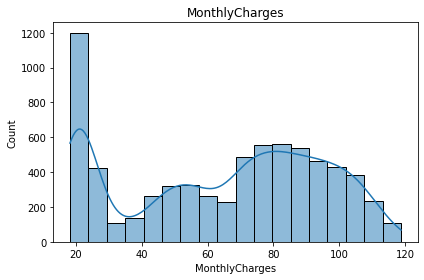

TotalCharges


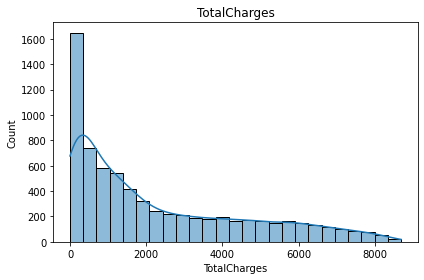

In [15]:
for col in nums:
    print(col)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(col)
    plt.tight_layout()
    plt.show()

SeniorCitizen


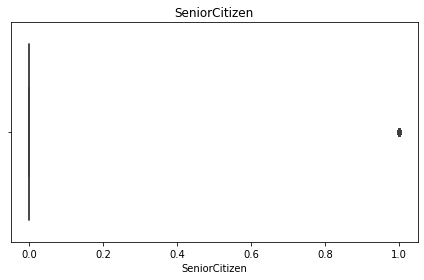

tenure


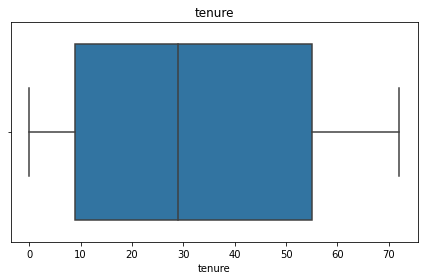

MonthlyCharges


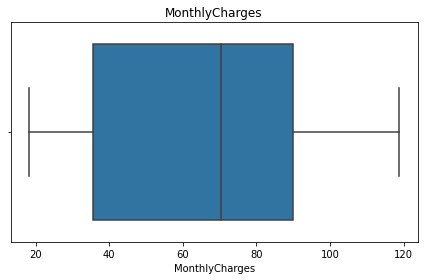

TotalCharges


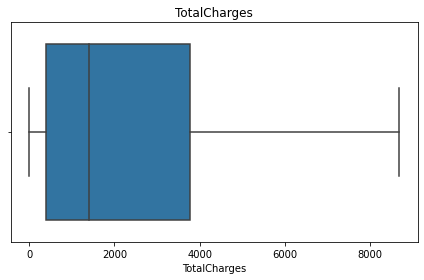

In [16]:
for col in nums:
    print(col)
    sns.boxplot(data=df, x=col)
    plt.title(col)
    plt.tight_layout()
    plt.show()

SeniorCitizen


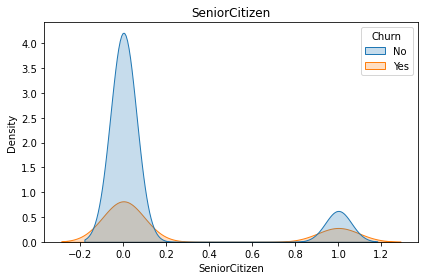

tenure


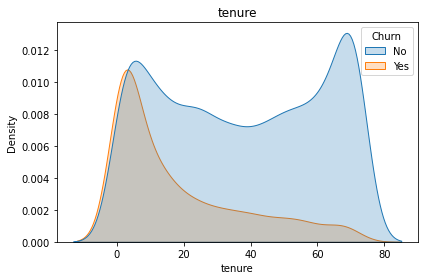

MonthlyCharges


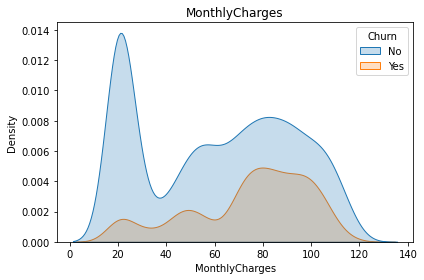

TotalCharges


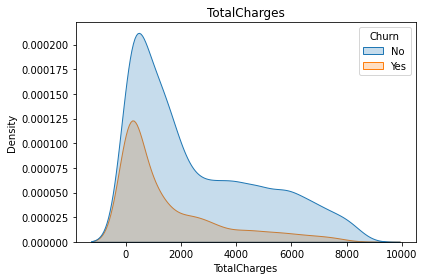

In [17]:
for col in nums:
    print(col)
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True)
    plt.title(col)
    plt.tight_layout()
    plt.show()

SeniorCitizen


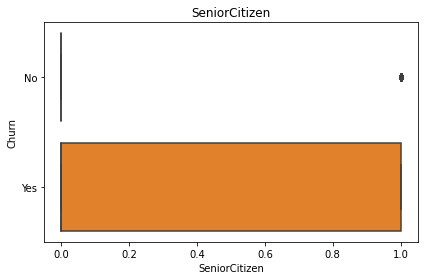

tenure


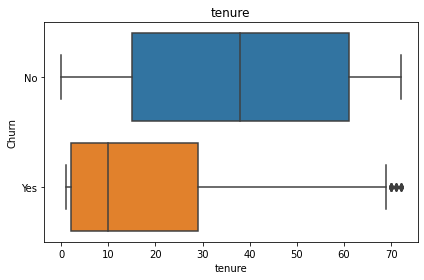

MonthlyCharges


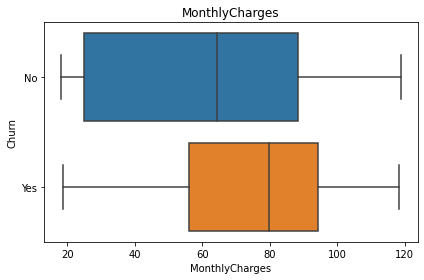

TotalCharges


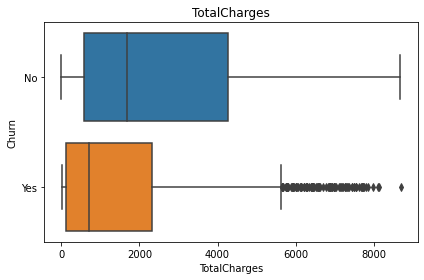

In [18]:
for col in nums:
    print(col)
    sns.boxplot(data=df, x=col, y='Churn')
    plt.title(col)
    plt.tight_layout()
    plt.show()

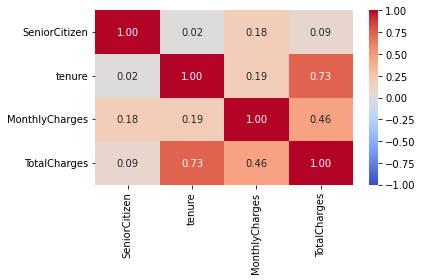

In [19]:
# plt.figure(figsize=(12,12))
ax = sns.heatmap(df.corr(method='kendall'), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
plt.tight_layout()
plt.show()

# FEATURE EXTRACTION

After understanding all the features in the data set and the objective in this project, we can create new features in attempt to help achieve the goal of the project.

In [20]:
df['tenureYear'] = df['tenure']/12
df['AnnualCharges'] = df['MonthlyCharges']*12
coef = np.polyfit(df['tenureYear'], df['AnnualCharges'], 1)
df['residual'] = df['AnnualCharges'] - (coef[0]*df['tenureYear'] + coef[1])

In [21]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenureYear', 'AnnualCharges', 'residual'],
      dtype='object')

# SPLITTING DATA

To prevent data leak, data is first split into training data and testing data. Any data transformation done to the training set will then also be done on the testing set accordingly.

In [22]:
columns = [col for col in df.columns if col not in ['customerID', target_label]]
cats = [col for col in columns if df[col].dtype == 'object']
nums = [col for col in columns if df[col].dtype != 'object']
X = df[columns].copy()
y = df[target_label].copy()
X.shape, y.shape

((7043, 22), (7043,))

In [23]:
mapping_churn = {
    'No' : 0,
    'Yes' : 1
}

y = y.map(mapping_churn)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X.copy(), y.copy(), test_size=0.25, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5282, 22), (1761, 22), (5282,), (1761,))

# DATA TRANSFORMATION (TRAIN)

## OUTLIERS

In [25]:
# Z-score
# print(f'Rows before filtering outliers: {len(X_train)}')
# filtered_entries = np.array([True] * len(X_train))
# for col in X_train.columns:
#     zscore = abs(st.zscore(X_train[col]))
#     filtered_entries = (zscore < 3) & filtered_entries # keeping absolute z score under 3
# X_train = X_train[filtered_entries] # filter z score under 3
# print(f'Rows after filtering outliers: {len(X_train)}')

In [26]:
# X_train.index

In [27]:
# y_train = y_train[X_train.index]
# y_train.shape

## DISTRIBUTION

In [28]:
# transforming distributions

## SCALING

In [29]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [30]:
scaler.fit(X_train[nums])
X_train_scaled = scaler.transform(X_train[nums])
X_train[nums] = X_train_scaled
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenureYear,AnnualCharges,residual
6661,Female,0.0,Yes,Yes,0.919786,No,No phone service,DSL,No,Yes,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),-0.308962,0.695160,0.919786,-0.308962,-0.571137
4811,Female,0.0,No,No,-0.534759,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,-0.449232,-0.345363,-0.534759,-0.449232,-0.321730
2193,Male,0.0,No,Yes,0.577540,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,-0.903965,-0.042500,0.577540,-0.903965,-1.100330
1904,Male,0.0,No,No,0.577540,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,0.439147,1.083674,0.577540,0.439147,0.304630
6667,Female,0.0,No,No,-0.427807,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,0.165941,-0.191823,-0.427807,0.165941,0.292643


## LABEL ENCODING

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
labels = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
encoders = []
for i,label in enumerate(labels):
    i = LabelEncoder()
    i.fit(X_train[label])
    X_train[label] = i.transform(X_train[label])
    encoders.append(i)

In [33]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenureYear,AnnualCharges,residual
6661,0,0.0,1,1,0.919786,0,No phone service,DSL,No,Yes,No,Yes,Yes,Yes,Two year,0,Credit card (automatic),-0.308962,0.695160,0.919786,-0.308962,-0.571137
4811,0,0.0,0,0,-0.534759,1,No,DSL,No,No,No,No,No,No,Month-to-month,1,Mailed check,-0.449232,-0.345363,-0.534759,-0.449232,-0.321730
2193,1,0.0,0,1,0.577540,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,1,Mailed check,-0.903965,-0.042500,0.577540,-0.903965,-1.100330
1904,1,0.0,0,0,0.577540,1,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,Month-to-month,1,Electronic check,0.439147,1.083674,0.577540,0.439147,0.304630
6667,0,0.0,0,0,-0.427807,1,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,0.165941,-0.191823,-0.427807,0.165941,0.292643


## ONE HOT ENCODING

In [34]:
from sklearn.preprocessing import OneHotEncoder
onehotcats = [col for col in cats if col not in labels]
ohe = OneHotEncoder(drop='first', sparse=False).fit(X_train[onehotcats])

In [35]:
ohe.get_feature_names(onehotcats)

array(['MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [36]:
# X_train_ohe = ohe.transform(X_train[onehotcats])
# X_train[ohe.get_feature_names_out()] = X_train_ohe
# X_train = X_train[[col for col in X_train if col not in onehotcats]].copy()
# X_train.head()

In [37]:
X_train_ohe = ohe.transform(X_train[onehotcats])
to_merge = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(onehotcats))
X_train = X_train.reset_index().drop('index', axis=1)
X_train[ohe.get_feature_names(onehotcats)] = to_merge
X_train = X_train[[col for col in X_train if col not in onehotcats]].copy()
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,tenureYear,AnnualCharges,residual,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.0,1,1,0.919786,0,0,-0.308962,0.695160,0.919786,-0.308962,-0.571137,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0,0.0,0,0,-0.534759,1,1,-0.449232,-0.345363,-0.534759,-0.449232,-0.321730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0.0,0,1,0.577540,1,1,-0.903965,-0.042500,0.577540,-0.903965,-1.100330,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,0.0,0,0,0.577540,1,1,0.439147,1.083674,0.577540,0.439147,0.304630,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,0.0,0,0,-0.427807,1,1,0.165941,-0.191823,-0.427807,0.165941,0.292643,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [38]:
X_train.shape

(5282, 33)

## CLASS IMBALANCE

In [39]:
pd.Series(y_train).value_counts()

0    3880
1    1402
Name: Churn, dtype: int64

In [40]:
from imblearn import over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(sampling_strategy=0.5, random_state=42).fit_resample(X_train, y_train)

In [41]:
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

SMOTE
0    3880
1    1940
Name: Churn, dtype: int64


In [42]:
X_train, y_train = X_over_SMOTE, y_over_SMOTE
X_train.shape, y_train.shape

((5820, 33), (5820,))

# DATA TRANSFORMATION (TEST)

## SCALING

In [43]:
X_test_scaled = scaler.transform(X_test[nums])
X_test[nums] = X_test_scaled
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenureYear,AnnualCharges,residual
5909,Female,0.0,No,No,0.491979,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,One year,Yes,Mailed check,0.177859,0.844004,0.491979,0.177859,0.054612
3670,Female,0.0,Yes,Yes,0.085561,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),-0.848040,-0.158466,0.085561,-0.848040,-0.907842
6220,Male,0.0,Yes,Yes,-0.406417,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),-0.308045,-0.250480,-0.406417,-0.308045,-0.208994
5905,Male,0.0,No,No,-0.598930,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,0.265872,-0.376836,-0.598930,0.265872,0.443780
6435,Male,0.0,Yes,Yes,0.491979,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,-0.372221,0.338697,0.491979,-0.372221,-0.520798


## LABEL ENCODING

In [44]:
labels = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for i, label in enumerate(labels):
    X_test[label] = encoders[i].transform(X_test[label])

In [45]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenureYear,AnnualCharges,residual
5909,0,0.0,0,0,0.491979,1,Yes,Fiber optic,No,Yes,No,No,No,No,One year,1,Mailed check,0.177859,0.844004,0.491979,0.177859,0.054612
3670,0,0.0,1,1,0.085561,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Bank transfer (automatic),-0.848040,-0.158466,0.085561,-0.848040,-0.907842
6220,1,0.0,1,1,-0.406417,0,No phone service,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,0,Credit card (automatic),-0.308045,-0.250480,-0.406417,-0.308045,-0.208994
5905,1,0.0,0,0,-0.598930,1,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,1,Electronic check,0.265872,-0.376836,-0.598930,0.265872,0.443780
6435,1,0.0,1,1,0.491979,0,No phone service,DSL,No,Yes,Yes,Yes,Yes,No,Two year,0,Mailed check,-0.372221,0.338697,0.491979,-0.372221,-0.520798


## ONE HOT ENCODING

In [46]:
X_test_ohe = ohe.transform(X_test[onehotcats])
to_merge = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(onehotcats))
X_test = X_test.reset_index().drop('index', axis=1)
X_test[ohe.get_feature_names(onehotcats)] = to_merge
X_test = X_test[[col for col in X_test if col not in onehotcats]].copy()
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,tenureYear,AnnualCharges,residual,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.0,0,0,0.491979,1,1,0.177859,0.844004,0.491979,0.177859,0.054612,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,0.0,1,1,0.085561,1,0,-0.848040,-0.158466,0.085561,-0.848040,-0.907842,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,1,1,-0.406417,0,0,-0.308045,-0.250480,-0.406417,-0.308045,-0.208994,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1,0.0,0,0,-0.598930,1,1,0.265872,-0.376836,-0.598930,0.265872,0.443780,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,0.0,1,1,0.491979,0,0,-0.372221,0.338697,0.491979,-0.372221,-0.520798,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# FEATURE SELECTION

The data is now transformed and ready to be processed for machine learning. However, issues such as dimensionality and multicollinearity can still hinder us from getting the best performing machine learning model. As such, this section will attempt to solve such issues. Important features will be selected using Boruta, categorical features will be ranked using Chi-squared, and multicollinearity will be solved using Pearson correlation matrix.

## FEATURE IMPORTANCE

In [47]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

In [48]:
brt = BorutaPy(rf, n_estimators='auto', random_state=42)
brt.fit(np.array(X_train), np.array(y_train))
brt_ranking = brt.ranking_

<AxesSubplot:>

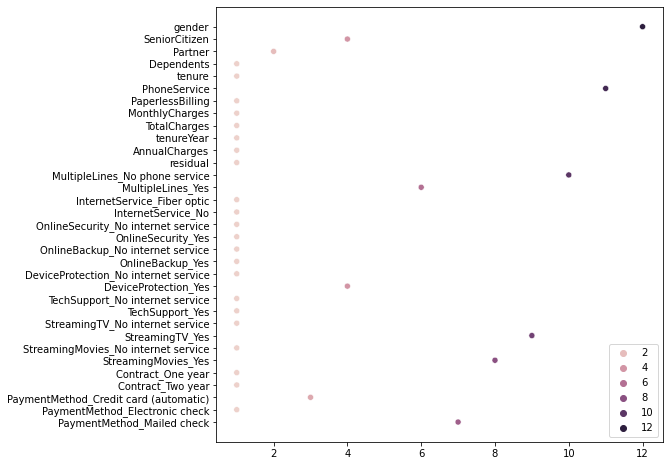

In [49]:
plt.figure(figsize=(8,8))
sns.scatterplot(y=[col for col in X_train.columns.values], x=brt_ranking, hue=brt_ranking)

In [50]:
selected_features = {}
for i, col in enumerate(X_train.columns):
    if brt_ranking[i] <= 2:
        selected_features[col] = brt_ranking[i]
selected_features

{'Partner': 2,
 'Dependents': 1,
 'tenure': 1,
 'PaperlessBilling': 1,
 'MonthlyCharges': 1,
 'TotalCharges': 1,
 'tenureYear': 1,
 'AnnualCharges': 1,
 'residual': 1,
 'InternetService_Fiber optic': 1,
 'InternetService_No': 1,
 'OnlineSecurity_No internet service': 1,
 'OnlineSecurity_Yes': 1,
 'OnlineBackup_No internet service': 1,
 'OnlineBackup_Yes': 1,
 'DeviceProtection_No internet service': 1,
 'TechSupport_No internet service': 1,
 'TechSupport_Yes': 1,
 'StreamingTV_No internet service': 1,
 'StreamingMovies_No internet service': 1,
 'Contract_One year': 1,
 'Contract_Two year': 1,
 'PaymentMethod_Electronic check': 1}

In [51]:
features = [k for k in selected_features.keys()]

## CHI-SQUARED

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [53]:
features_cat = [col for col in np.concatenate((labels,ohe.get_feature_names(onehotcats))) if col in features]
select = SelectKBest(score_func=chi2, k=5)
selector = select.fit(X_train[features_cat], y_train)

In [54]:
scores = pd.DataFrame(features_cat)
scores['score'] = selector.scores_
scores = scores.sort_values('score', ascending=False)

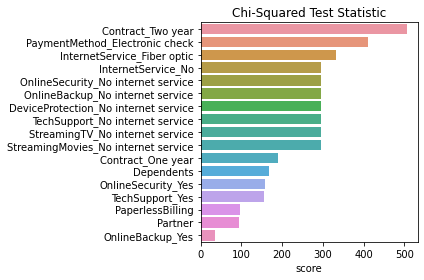

In [55]:
sns.barplot(data=scores, x='score', y=0)
plt.title('Chi-Squared Test Statistic')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [56]:
filtered_score = scores[scores['score']<=200]
filtered_score[0].values

array(['Contract_One year', 'Dependents', 'OnlineSecurity_Yes',
       'TechSupport_Yes', 'PaperlessBilling', 'Partner',
       'OnlineBackup_Yes'], dtype=object)

In [57]:
features1 = [col for col in features if col not in filtered_score[0].values]
features1

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'tenureYear',
 'AnnualCharges',
 'residual',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service',
 'Contract_Two year',
 'PaymentMethod_Electronic check']

## MULTICOLLINEARITY

In [58]:
temp = X_train[features1].copy()
temp[target_label] = y_train.copy()
corr = temp.corr(method='pearson')#.sort_values(y_train_label, ascending=False)

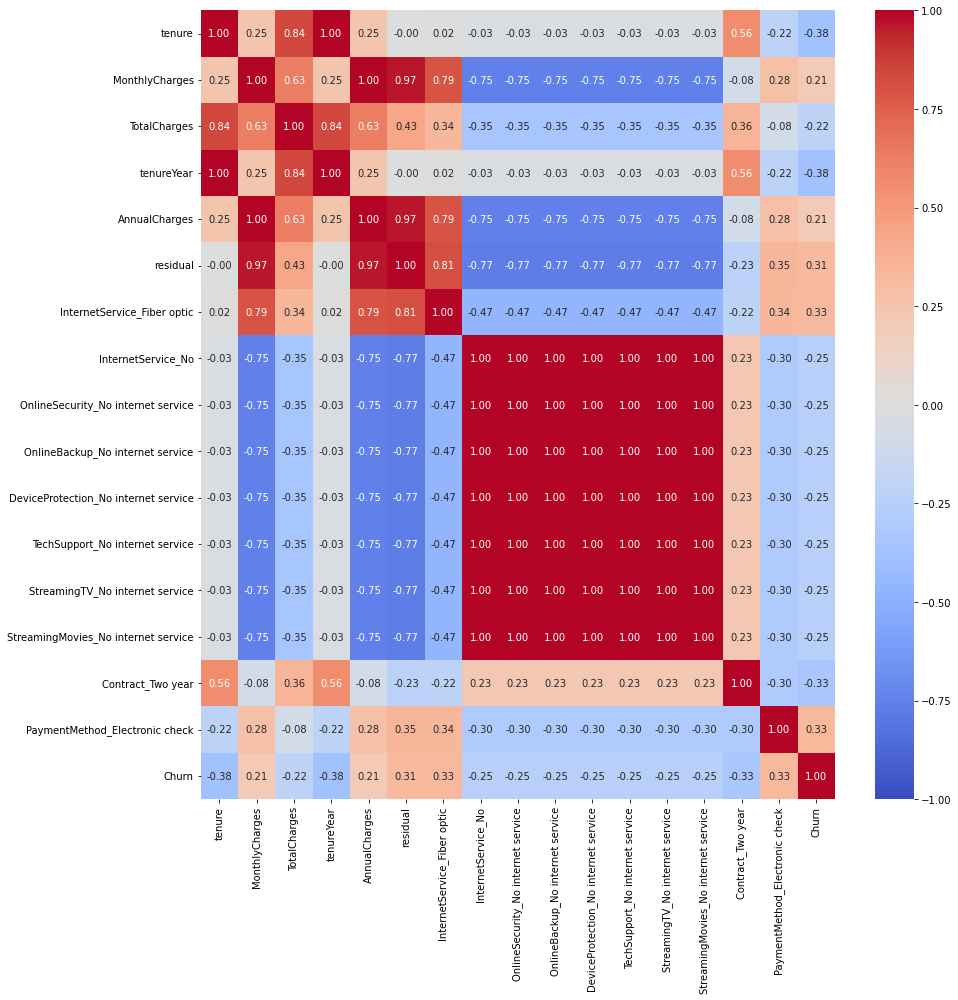

In [59]:
plt.figure(figsize=(14,14))
ax = sns.heatmap(corr, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [60]:
to_drop = [
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service',
    'StreamingTV_No internet service',
    'StreamingMovies_No internet service',
    'tenure',
    'TotalCharges',
    'MonthlyCharges',
]

features2 = [f for f in features1 if f not in to_drop]

In [61]:
temp = X_train[features2].copy()
temp[target_label] = y_train.copy()
corr = temp.corr(method='pearson')#.sort_values(y_train_label, ascending=False)

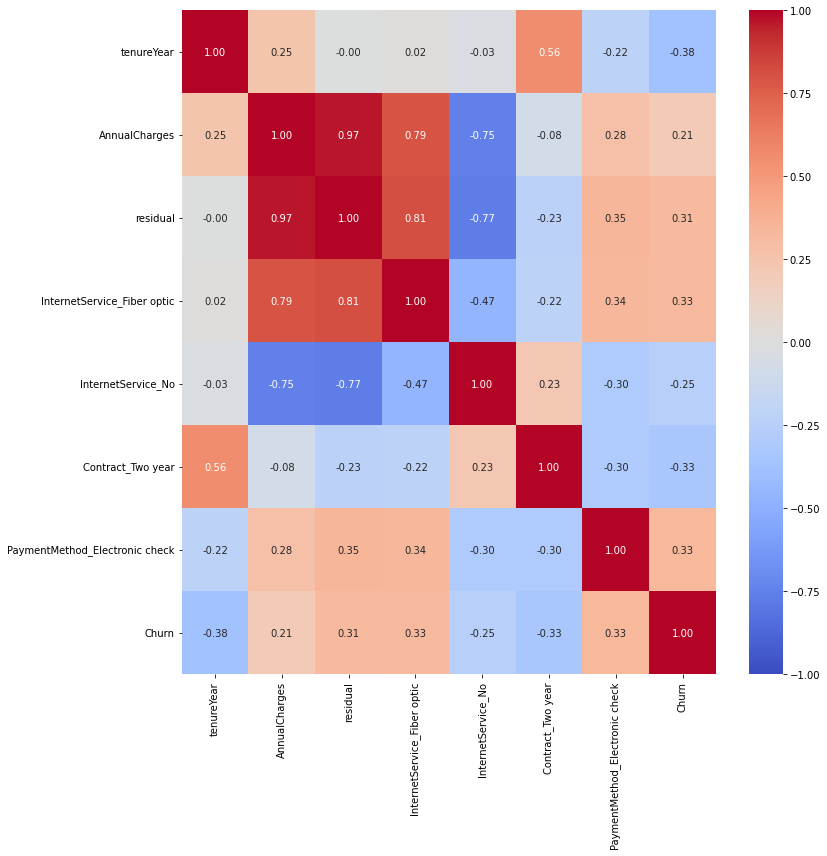

In [62]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(corr, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [63]:
to_drop = [
    'InternetService_Fiber optic',
    'InternetService_No',
    'AnnualCharges'
]

features3 = [f for f in features2 if f not in to_drop]

In [64]:
temp = X_train[features3].copy()
temp[target_label] = y_train.copy()
corr = temp.corr(method='pearson')#.sort_values(y_train_label, ascending=False)

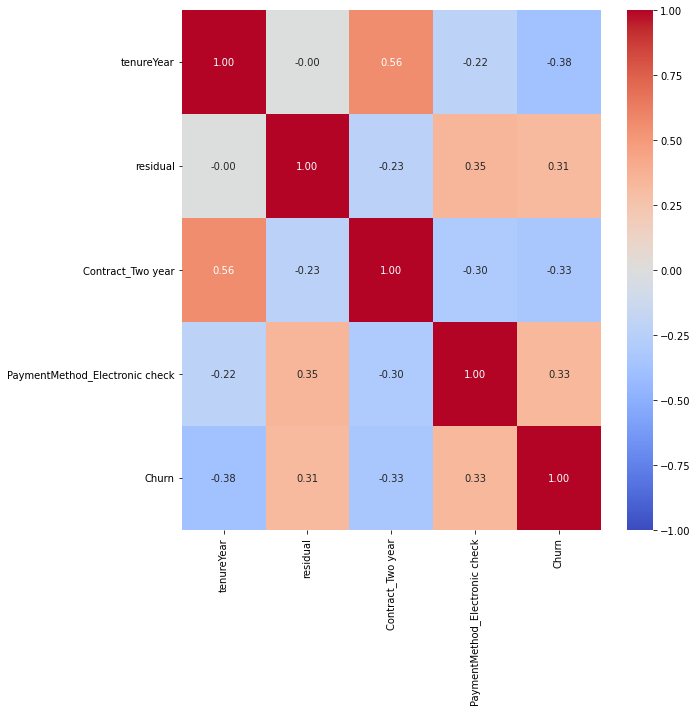

In [65]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [66]:
feat = features3

# MACHINE LEARNING MODEL

To find the best model, a list of estimators will be fitted on our training data and evaluated on the testing data as an initial step to quickly find the potentially top-performing models. The metrics we look at are the Recall scores since we want to minimize False Negatives, the customers who are actually churning but are not predicted correctly, and also the ROC AUC scores to evaluate the model's performance on imbalanced data.

## MODEL SELECTION

In [67]:
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import recall_score

C:\Users\fnurr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [68]:
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=recall_score)
models, predictions = clf.fit(X_train[feat], X_test[feat], y_train, y_test)
print(models)

 14%|█▍        | 4/29 [00:00<00:04,  5.61it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 90%|████████▉ | 26/29 [00:08<00:01,  2.98it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:09<00:00,  3.02it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.71               0.75     0.75      0.73   
GaussianNB                         0.70               0.75     0.75      0.71   
NearestCentroid                    0.72               0.74     0.74      0.74   
SGDClassifier                      0.76               0.74     0.74      0.77   
PassiveAggressiveClassifier        0.72               0.73     0.73      0.74   
BernoulliNB                        0.73               0.73     0.73      0.74   
LabelSpreading                     0.79               0.72     0.72      0.79   
LabelPropagation                   0.79               0.72     0.72      0.79   
LinearDiscriminantAnalysis         0.78               0.72     0.72      0.78   
AdaBoostClassifier                 0.77               0.72     0.72      0.77   
SVC                         

## CROSS VALIDATION

After the inital evaluation, we can pick out a few of the best models based on the set metrics and perform cross validation on those models to assess the robustness of the model.

In [69]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, roc_auc_score

In [71]:
from sklearn.utils.extmath import softmax
from sklearn.metrics.pairwise import pairwise_distances

def predict_proba(self, X):
    distances = pairwise_distances(X, self.centroids_, metric=self.metric)
    probs = softmax(distances)
    return probs

In [72]:
from sklearn.model_selection import cross_val_score, KFold
def model_evaluation(model, X_train, y_train, scoring='recall', cv=5):
    cv_results = cross_val_score(model, X_train[feat], y_train, scoring=scoring, cv=cv)
    avg_res = abs(np.mean(cv_results))
    return avg_res

In [73]:
qda=QuadraticDiscriminantAnalysis()
gnb=GaussianNB()
nc=NearestCentroid()
sgd=SGDClassifier()
pac=PassiveAggressiveClassifier()

models=[
    qda,
    gnb,
    nc,
    sgd,
    pac,
]

In [74]:
results = []
print('RECALL SCORES ON TRAINING DATA:\n')
for i, model in enumerate(models):
    result = model_evaluation(model, X_train[feat], y_train)
    print(model,':',result)

RECALL SCORES ON TRAINING DATA:

QuadraticDiscriminantAnalysis() : 0.8103092783505155
GaussianNB() : 0.8304123711340207
NearestCentroid() : 0.7829896907216494
SGDClassifier() : 0.5536082474226804
PassiveAggressiveClassifier() : 0.6448453608247423


In [75]:
results = []
print('ROC AUC SCORES ON TRAINING DATA:\n')
for i, model in enumerate(models):
    if model!=nc:
        result = model_evaluation(model, X_train[feat], y_train, scoring='roc_auc')
    else:
        kf = KFold(n_splits=5, random_state=None, shuffle=False)
        res = []
        for train_index, test_index in kf.split(X_train, y=y_train):
            X1, X2 = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
            y1, y2 = y_train[train_index], y_train[test_index]
            model.fit(X1, y1)
            res.append(roc_auc_score(y2, predict_proba(nc, X2)[:,0]))
        result = np.mean(res)
    print(model,':',result)

ROC AUC SCORES ON TRAINING DATA:

QuadraticDiscriminantAnalysis() : 0.8234067780848123
GaussianNB() : 0.8193494925071739
NearestCentroid() : 0.8290518920598794
SGDClassifier() : 0.8173308135827397
PassiveAggressiveClassifier() : 0.7621522611329578


## PREDICTION

In [76]:
test_results = []
print('RECALL SCORES ON TEST DATA:\n')
for model in models:
    model.fit(X_train[feat], y_train)
    y_pred = model.predict(X_test[feat])
    test_results.append(recall_score(y_test, y_pred))
for i, model in enumerate(models):
    print(model, ':', test_results[i])

RECALL SCORES ON TEST DATA:

QuadraticDiscriminantAnalysis() : 0.8351177730192719
GaussianNB() : 0.8501070663811563
NearestCentroid() : 0.7965738758029979
SGDClassifier() : 0.5524625267665952
PassiveAggressiveClassifier() : 0.004282655246252677


In [77]:
test_results = []
print('ROC AUC SCORES ON TEST DATA:\n')
for model in models:
    model.fit(X_train[feat], y_train)
    y_pred = model.predict(X_test[feat])
    test_results.append(roc_auc_score(y_test, y_pred))
for i, model in enumerate(models):
    print(model, ':', test_results[i])

ROC AUC SCORES ON TEST DATA:

QuadraticDiscriminantAnalysis() : 0.7487026268496669
GaussianNB() : 0.7457645069154623
NearestCentroid() : 0.7483642176542037
SGDClassifier() : 0.6807742206659628
PassiveAggressiveClassifier() : 0.512461566975234


# HYPERPARAMETER TUNING

Now that we have tested the models on the training data, the testing data, and also evaluated them using cross validation, we can see which of the models actually perform well overall. To further improve these models, hyperparamater tuning is done.

In [78]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## GAUSSIAN NAIVE BAYES

In [79]:
var_smoothing = np.logspace(0,-9, num=1500)

In [80]:
hyperparameters = dict(var_smoothing=var_smoothing)

In [81]:
gs = GridSearchCV(estimator=gnb, param_grid=hyperparameters, verbose=1, cv=5, n_jobs=-1, scoring='recall')
model1 = gs.fit(X_train[feat], y_train)

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 4920 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 7500 out of 7500 | elapsed:   13.2s finished


In [82]:
print(model1.best_estimator_)
print(abs(model1.best_score_))

GaussianNB(var_smoothing=0.0013870583458587037)
0.8304123711340207


In [83]:
y_pred1 = model1.predict(X_test[feat])
print('Recall Score  :', recall_score(y_test, y_pred1))
print('ROC AUC Score :', roc_auc_score(y_test, y_pred1))

Recall Score  : 0.8501070663811563
ROC AUC Score : 0.7457645069154623


In [84]:
print(classification_report(y_test, y_pred1, labels=sorted(model1.classes_, reverse=True)))

              precision    recall  f1-score   support

           1       0.46      0.85      0.60       467
           0       0.92      0.64      0.76      1294

    accuracy                           0.70      1761
   macro avg       0.69      0.75      0.68      1761
weighted avg       0.80      0.70      0.71      1761



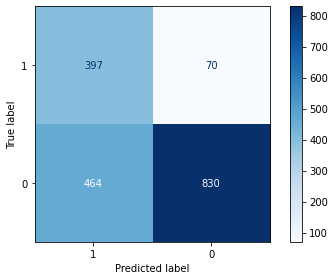

In [85]:
cm = confusion_matrix(y_test, y_pred1, labels=sorted(model1.classes_, reverse=True))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(model1.classes_, reverse=True))
disp.plot(cmap='Blues')
plt.tight_layout()
plt.show()

## QUADRATIC DISCRIMINANT ANALYSIS

In [86]:
reg_param = np.linspace(0,0.5, num=1500)

In [87]:
hyperparameters = dict(reg_param=reg_param)

In [88]:
gs = GridSearchCV(estimator=qda, param_grid=hyperparameters, verbose=1, cv=5, n_jobs=-1, scoring='recall')
model2 = gs.fit(X_train[feat], y_train)

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1640 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 5640 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 7500 out of 7500 | elapsed:   10.0s finished


In [89]:
print(model1.best_estimator_)
print(abs(model1.best_score_))

QuadraticDiscriminantAnalysis()
0.8103092783505155


In [90]:
y_pred2 = model2.predict(X_test[feat])
print('Recall Score  :', recall_score(y_test, y_pred2))
print('ROC AUC Score :', roc_auc_score(y_test, y_pred2))

Recall Score  : 0.8351177730192719
ROC AUC Score : 0.7487026268496669


In [91]:
print(classification_report(y_test, y_pred2, labels=sorted(model2.classes_, reverse=True)))

              precision    recall  f1-score   support

           1       0.47      0.84      0.60       467
           0       0.92      0.66      0.77      1294

    accuracy                           0.71      1761
   macro avg       0.69      0.75      0.69      1761
weighted avg       0.80      0.71      0.73      1761



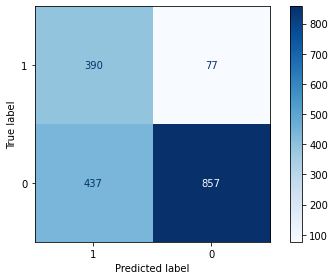

In [92]:
cm = confusion_matrix(y_test, y_pred2, labels=sorted(model2.classes_, reverse=True))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(model2.classes_, reverse=True))
disp.plot(cmap='Blues')
plt.tight_layout()
plt.show()

## NEAREST CENTROID

In [93]:
metric = ['euclidean', 'manhattan', 'l1', 'l2' ,'cityblock', 'cosine']
shrink_threshold = np.arange(0,1,0.001)

In [94]:
hyperparameters = dict(
    metric=metric,
    shrink_threshold=shrink_threshold,
)

In [95]:
gs = GridSearchCV(estimator=nc, param_grid=hyperparameters, verbose=1, cv=5, n_jobs=-1, scoring='recall')
model3 = gs.fit(X_train[feat], y_train)

Fitting 5 folds for each of 6000 candidates, totalling 30000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1640 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 5640 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 11240 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 18440 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 27240 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 30000 out of 30000 | elapsed:   40.3s finished


In [96]:
print(model3.best_estimator_)
print(abs(model3.best_score_))

NearestCentroid(metric='l1', shrink_threshold=0.6960000000000001)
0.8469072164948453


In [97]:
y_pred3 = model3.predict(X_test[feat])
print('Recall Score  :', recall_score(y_test, y_pred3))
print('ROC AUC Score :', roc_auc_score(y_test, y_pred3))

Recall Score  : 0.880085653104925
ROC AUC Score : 0.7344786843577177


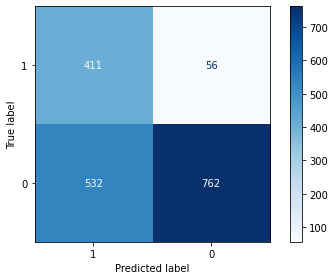

In [98]:
cm = confusion_matrix(y_test, y_pred3, labels=sorted(model3.classes_, reverse=True))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(model3.classes_, reverse=True))
disp.plot(cmap='Blues')
plt.tight_layout()
plt.show()

The conclusion for the best machine learning model:
- If we are solely looking for the best Recall score, then the hyperparameter-tuned version of Nearest Centroid is the go-to model (88% Recall, 0.734 ROC AUC).
- Gaussian Naive Bayes may be the second best (85% Recall, 0.746 ROC AUC) after hyperparameter tuning
- Quadratic Discriminant Analysis was the third best (84% Recall, 0.749 ROC AUC)

All of these models should perform just as well as they were have been validated and are proven to be computationally efficient, but we can pick Nearest Centroid since it has the best Recall score out of all and that their ROC AUC scores are close.

# BUSINESS SOLUTION

Using the selected machine learning model above, we are now able to predict when customers are churning. As previously stated in the introduction, the company wants to make sure that the customer is worth retaining. The proposed method of determing the customer value is calculating the vertical distance between the customer's data point and the regression line of annual charges on tenure in years, otherwise known as the residual values. The residual value determines the maximum amount of discount that can still be provided for a customer to end up profitable. A positive value indicates that there is room to give a profitable discount, while a negative value indicates this means that the customer is in the red and is low in terms of customer value.

## DETERMINING CUSTOMER VALUE

In [100]:
df['residual'].describe()

count   7043.00
mean      -0.00
std      349.81
min     -689.98
25%     -327.01
50%       74.94
75%      299.31
max      652.51
Name: residual, dtype: float64

In [112]:
print(df['residual'].mean())
print(df[df['Churn']=='No']['residual'].mean())

-4.1066404067522835e-13
-60.90692641173676


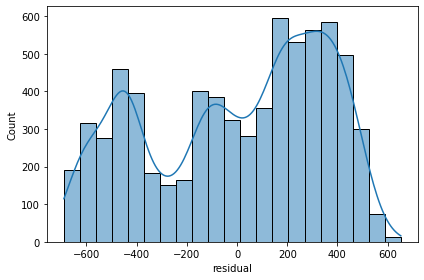

In [101]:
sns.histplot(data=df, x='residual', kde=True)
plt.tight_layout()
plt.show()

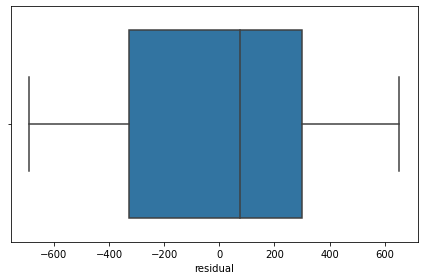

In [102]:
sns.boxplot(data=df, x='residual')
plt.tight_layout()
plt.show()

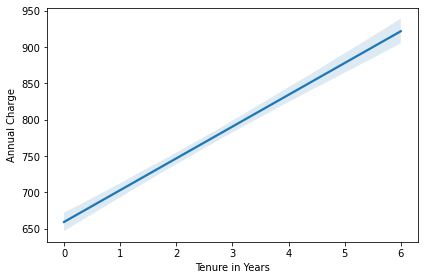

In [103]:
sns.regplot(data=df, x='tenureYear', y='AnnualCharges', scatter=False)
plt.xlabel('Tenure in Years')
plt.ylabel('Annual Charge')
plt.tight_layout()
plt.show()

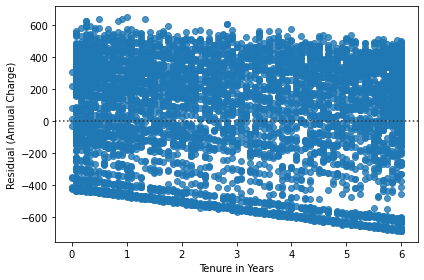

In [104]:
sns.residplot(data=df,x='tenureYear', y='AnnualCharges')
plt.xlabel('Tenure in Years')
plt.ylabel('Residual (Annual Charge)')
plt.tight_layout()
plt.show()

In [105]:
df[(df['Churn'] == 'Yes') & (df['residual'] > 0) & (df['tenureYear'] < 3)].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureYear,AnnualCharges,residual
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.17,848.40,181.95
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,0.67,1195.80,507.49
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,2.33,1257.60,496.39
29,8773-HHUOZ,Female,0,No,Yes,17,Yes,No,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,64.70,1093.10,Yes,1.42,776.40,55.28
36,6047-YHPVI,Male,0,No,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,316.90,Yes,0.42,836.40,159.02


In [106]:
df[(df['Churn'] == 'Yes') & (df['residual'] < 0) & (df['tenureYear'] >= 3)].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureYear,AnnualCharges,residual
168,3445-HXXGF,Male,1,Yes,No,58,No,No phone service,DSL,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,45.30,2651.20,Yes,4.83,543.60,-326.95
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.60,Yes,4.92,232.20,-641.99
430,9063-ZGTUY,Female,0,Yes,Yes,61,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,1182.55,Yes,5.08,232.80,-648.68
481,0447-BEMNG,Female,0,Yes,No,48,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),45.30,2145.00,Yes,4.00,543.60,-290.50
641,4580-TMHJU,Female,0,Yes,Yes,43,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,56.15,2499.30,Yes,3.58,673.80,-142.08


In [107]:
customer1 = df.iloc[5]
customer2 = df.iloc[430] 

Maximum discount for customer #1: 507.48509663881623
Maximum discount for customer #2: -648.6837438132818


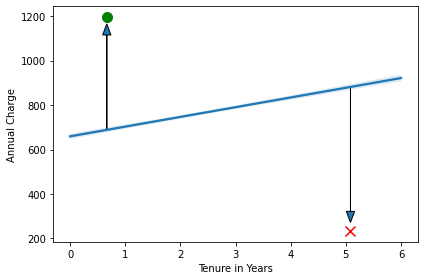

In [117]:
sns.regplot(data=df, x='tenureYear', y='AnnualCharges', scatter=False)
plt.xlabel('Tenure in Years')
plt.ylabel('Annual Charge')

plt.scatter(x=customer1['tenureYear'], y=customer1['AnnualCharges'], c='green', marker='o', s=100)
# plt.axvline(x=customer1['tenureYear'], ymin=0.5, ymax=0.92, c='green')
plt.arrow(customer1['tenureYear'], coef[0]*customer1['tenureYear']+coef[1], 0, customer1['residual']*0.94,
          length_includes_head=True, linewidth=1, head_width=0.15, head_length=50)
print('Maximum discount for customer #1:', customer1['residual'])

plt.scatter(x=customer2['tenureYear'], y=customer2['AnnualCharges'], c='red', marker='x', s=100)
# plt.axvline(x=customer2['tenureYear'], ymin=0.08, ymax=0.63, c='red')
plt.arrow(customer2['tenureYear'], coef[0]*customer2['tenureYear']+coef[1], 0, customer2['residual']*0.94,
          length_includes_head=True, linewidth=1, head_width=0.15, head_length=50)
print('Maximum discount for customer #2:', customer2['residual'])
plt.savefig('residual.jpg', bbox_inches='tight')
plt.tight_layout()
plt.show()

The graph above shows two customer's data points:
- Green Dot: a customer whose residual is positive
- Red X-mark: a customer whose residual is negative

The green dot still has a maximum discount of ~500 that can still be given. The company can provide an amount in below that number and still profit from the customer. Meanwhile, the red X-mark is negative. If the company were to give the customer any discount, it would only lower the customer's value even more in the coming tenures.

# CONCLUSION

After completing all the preliminary tasks, a machine learning model was successfully designed to clear our first objective which was to predict customers who are churning. Using several feature selection techniques, the resulting features that are used in our model are: `tenureYear`, `residual`, `Contract_Two year`, and `PaymentMethod_Electronic check`. Based on their Recall and ROC AUC scores, there were 3 hyperparameter-tuned machine learning models that performed best using the selected features; from the best to worst, they are: `Nearest Centroid`, `Gaussian Naive Bayes`, and `Quadratic Discriminant Analysis`.

To clear our second and third objective, a suitable customer retention program was designed. To determine a customer's value, the distance between the customer's data point and the regression line of annual charges on tenure in years is calculated, denoted as `residual`. A positive value indicates the maximum amount of discount that can be given for the customer, while a negative value indicates a low customer value.

# FUTURE WORKS

When aggregated, we see that the average of the residual values of all customers is practically at 0, while the average of the residual values of loyal customers are at -60. Giving customer discounts would mean that the average of the residual values would go even lower after the discount. A solution for this would be to run a cluster analysis to discover which customers are likely to upgrade their subscription. Upgrading customers' subscriptions would mean more income for the company and thus in turn allows more room to for customer retention.